# 1. Generiranje linearno nerazdvojivih podataka

C:\Users\Filip\git\DU\lab1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


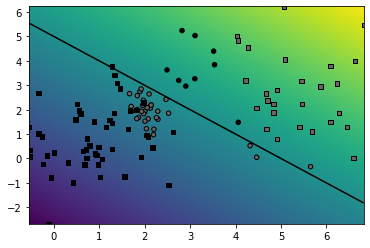

In [32]:
import numpy as np
import data
import matplotlib.pyplot as plt

np.random.seed(100)
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores    
    
# get data
X,Y_ = data.sample_gmm_2d(4, 2, 30)
# X,Y_ = data.sample_gauss_2d(2, 100)

# get the class predictions
Y = myDummyDecision(X)>0.5  

# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(myDummyDecision, rect, offset=0)
  
# graph the data points
data.graph_data(X, Y_, Y, special=[])

plt.show()


# 2. Višeslojna klasifikacija u Pythonu (20% bodova)

Oblikujte i izvedite modul fcann2 za rad s probabilističkim klasifikacijskim modelom s jednim skrivenim slojem prema uputama iz odjeljka 0a. Neka organizacija vašeg koda bude sukladna organizaciji modula logreg iz prethodne vježbe. Napišite metode fcann2_train, fcann2_classify. Isprobajte njihov rad na umjetnom skupu 2D podataka dvaju razreda dobivenih iz Gaussove mješavine od 6 komponenata.

Ovisno o parametrima i stanju generatora slučajnih brojeva, vaš rezultat mogao bi izgledati kao na sljedećoj slici. Naši parametri bili su: K=6, C=2, N=10, param_niter=1e5, param_delta=0.05, param_lambda=1e-3 (koeficijent regularizacije), dimenzija skrivenog sloja: 5.

In [33]:
import fcann2

Iter:  0 loss: 1.0026344135516314
Iter:  100 loss: 0.6578618553647684
Iter:  200 loss: 0.6605537725398974
Iter:  300 loss: 0.6583985054239035
Iter:  400 loss: 0.6558380817682379
Iter:  500 loss: 0.6544335904161459
Iter:  600 loss: 0.649600789520964
Iter:  700 loss: 0.6584796856335889
Iter:  800 loss: 0.6452061243219024
Iter:  900 loss: 0.6369321498994976
Iter:  1000 loss: 0.6300960701158547
Iter:  1100 loss: 0.6241180648129878
Iter:  1200 loss: 0.6160689049853653
Iter:  1300 loss: 0.6214367867747294
Iter:  1400 loss: 0.6215063607014873
Iter:  1500 loss: 0.6126842795830914
Iter:  1600 loss: 0.5605525506081881
Iter:  1700 loss: 0.5374010844210313
Iter:  1800 loss: 0.5405184125997377
Iter:  1900 loss: 0.5423503331362908
Iter:  2000 loss: 0.5345676016046073
Iter:  2100 loss: 0.5433102538037062
Iter:  2200 loss: 0.5323235350267511
Iter:  2300 loss: 0.5282921223146679
Iter:  2400 loss: 0.522100274814494
Iter:  2500 loss: 0.5233755414677351
Iter:  2600 loss: 0.5219046262635076
Iter:  2700 los

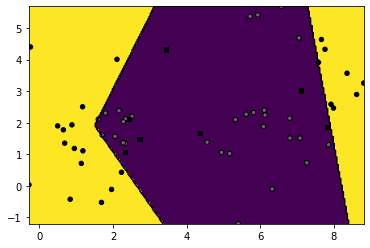

In [34]:
np.random.seed(100)
X, Y_ = data.sample_gmm_2d(6, 2, 10)
model = fcann2.FCANN2(2, 5, 2)

model.train(X,Y_, 10000, 0.1)

probs = model.forward(X)
Y = np.argmax(probs, axis=1)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
print("Accuracy: ", accuracy, "Precision: ", precision, "Recall: ", recall)

# iscrtaj rezultate, decizijsku plohu
rect= (np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(lambda X: model.classify(X), rect)
data.graph_data(X, Y_, np.argmax(probs, axis=1))
plt.show()

# 3. Linearna regresija u PyTorchu (10% bodova)

Jednostavan primjer implementacije algoritma strojnog učenja u PyTorchu prikazat ćemo na potpunom primjeru optimizacijskog postupka za određivanje parametara pravca y = a * x + b koji prolazi kroz točke (1,3) i (2,5).

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim


## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a*X + b

    diff = (Y-Y_)

    # kvadratni gubitak
    loss = torch.sum(diff**2)

    # računanje gradijenata
    loss.backward()

    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

    if i % 10 == 0:
        print(f'step: {i}, loss:{loss}, Y_:{Y_}, a:{a}, b:{b}')

step: 0, loss:48.82011413574219, Y_:tensor([-0.8436, -0.8350], grad_fn=<AddBackward0>), a:tensor([3.1113], requires_grad=True), b:tensor([1.0836], requires_grad=True)
step: 10, loss:0.02254243940114975, Y_:tensor([2.8721, 5.0786], grad_fn=<AddBackward0>), a:tensor([2.2007], requires_grad=True), b:tensor([0.6754], requires_grad=True)
step: 20, loss:0.012467452324926853, Y_:tensor([2.9050, 5.0587], grad_fn=<AddBackward0>), a:tensor([2.1492], requires_grad=True), b:tensor([0.7586], requires_grad=True)
step: 30, loss:0.006895318161696196, Y_:tensor([2.9294, 5.0437], grad_fn=<AddBackward0>), a:tensor([2.1110], requires_grad=True), b:tensor([0.8205], requires_grad=True)
step: 40, loss:0.0038135743234306574, Y_:tensor([2.9475, 5.0325], grad_fn=<AddBackward0>), a:tensor([2.0825], requires_grad=True), b:tensor([0.8665], requires_grad=True)
step: 50, loss:0.0021091552916914225, Y_:tensor([2.9609, 5.0241], grad_fn=<AddBackward0>), a:tensor([2.0614], requires_grad=True), b:tensor([0.9007], require

Ponovite osnove PyTorcha navedene u odjeljcima 0b i 0c. Analizirajte prikazani program te provjerite ispravnost izvođenja.

Modificirajte program na način da se pravac može provući kroz proizvoljan broj točaka. Pripazite da iznosi gradijenata budu neovisni o broju podataka.

Ispišite vrijednosti gradijenata tijekom napredovanja postupka.

Odredite analitičke izraze za gradijente funkcije gubitka po parametrima a i b. Izračunajte eksplicitno te gradijente. Ispišite vrijednosti gradijenata i uvjerite se da odgovaraju onima koje automatski određuje PyTorch.

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a * X + b

    diff = (Y-Y_)

    # srednji kvadratni gubitak - osiguran rad neovisno o broju ulaznih tocaka
    loss = torch.mean(diff**2) 

    # računanje gradijenata
    loss.backward()

    real_grad_a = 2 * torch.mean(-diff * X) 
    real_grad_b = 2 * torch.mean(-diff)
    if i % 10 == 0: 
        print(f'step: {i:2d}, loss: {loss:.6f}, PyTorch gradijent: a={a.grad.detach().numpy()[0]:.03f} b={b.grad.detach().numpy()[0]:.03f}, Analitički izračunan gradijent: a={real_grad_a:.03f} b={real_grad_b:.03f}')
    
    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

step:  0, loss: 4.888131, PyTorch gradijent: a=-6.971 b=-4.289, Analitički izračunan gradijent: a=-6.971 b=-4.289
step: 10, loss: 0.000661, PyTorch gradijent: a=-0.007 b=0.012, Analitički izračunan gradijent: a=-0.007 b=0.012
step: 20, loss: 0.000493, PyTorch gradijent: a=-0.006 b=0.010, Analitički izračunan gradijent: a=-0.006 b=0.010
step: 30, loss: 0.000367, PyTorch gradijent: a=-0.005 b=0.009, Analitički izračunan gradijent: a=-0.005 b=0.009
step: 40, loss: 0.000274, PyTorch gradijent: a=-0.005 b=0.008, Analitički izračunan gradijent: a=-0.005 b=0.008
step: 50, loss: 0.000204, PyTorch gradijent: a=-0.004 b=0.007, Analitički izračunan gradijent: a=-0.004 b=0.007
step: 60, loss: 0.000152, PyTorch gradijent: a=-0.004 b=0.006, Analitički izračunan gradijent: a=-0.004 b=0.006
step: 70, loss: 0.000113, PyTorch gradijent: a=-0.003 b=0.005, Analitički izračunan gradijent: a=-0.003 b=0.005
step: 80, loss: 0.000084, PyTorch gradijent: a=-0.003 b=0.004, Analitički izračunan gradijent: a=-0.00

# 4. Logistička regresija u PyTorchu (20% bodova)

Dopunite izvedbu razreda PTLogreg. Provjerite postiže li vaš program iste rezultate kao i odgovarajući program iz nulte vježbe za slučajeve dva i tri razreda podataka. Pripazite na to da gubitak karakterizirate tako da ne ovisi o broju podataka za učenje (tako je lakše interpretirati iznos gubitka te validirati korak učenja).

Dodajte regularizaciju na način da gubitak formulirate kao zbroj unakrsne entropije i L2 norme vektorizirane matrice težina pomnožene hiperparametrom param_lambda. Ispitajte utjecaj regularizacije na oblik decizijske plohe.

Eksperimentirajte s različitim vrijednostima hiperparametara. Pronađite kombinacije hiperparametara za koje vaš program ne uspijeva pronaći zadovoljavajuće rješenje i pokušajte objasniti što se događa.

In [37]:
import pt_logreg

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(4, 3, 5)
Yoh_ = data.class_to_onehot(Y_)

# definiraj model:
ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])

X = torch.from_numpy(X)
Yoh_ = torch.from_numpy(Yoh_)

# λ = 0.0

In [38]:
param_lambda=0.0

iter: 0 loss: 9.104268
iter: 100 loss: 0.542822
iter: 200 loss: 0.502384
iter: 300 loss: 0.483536
iter: 400 loss: 0.473014
iter: 500 loss: 0.466427
iter: 600 loss: 0.461948
iter: 700 loss: 0.458706
iter: 800 loss: 0.456243
iter: 900 loss: 0.454300
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


C:\Users\Filip\git\DU\lab1\pt_logreg.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float64)


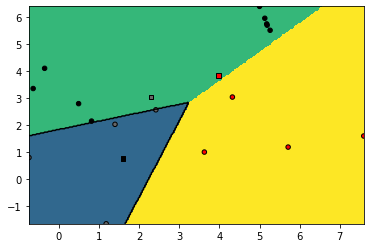

In [39]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
Y = ptlr.evaluate(X)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

# λ = 0.0001

In [40]:
param_lambda=0.0001

iter: 0 loss: 0.453038
iter: 100 loss: 0.451733
iter: 200 loss: 0.450628
iter: 300 loss: 0.449678
iter: 400 loss: 0.448852
iter: 500 loss: 0.448127
iter: 600 loss: 0.447485
iter: 700 loss: 0.446914
iter: 800 loss: 0.446402
iter: 900 loss: 0.445942
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


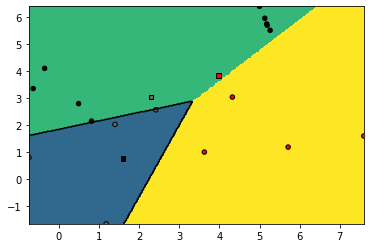

In [41]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# λ = 0.01 

In [42]:
param_lambda=0.01

iter: 0 loss: 0.479651
iter: 100 loss: 0.478971
iter: 200 loss: 0.478487
iter: 300 loss: 0.478071
iter: 400 loss: 0.477697
iter: 500 loss: 0.477354
iter: 600 loss: 0.477037
iter: 700 loss: 0.476743
iter: 800 loss: 0.476468
iter: 900 loss: 0.476212
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


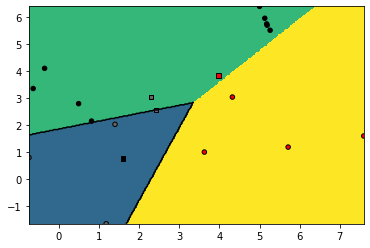

In [43]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# λ = 0.1 

In [44]:
param_lambda=0.1

iter: 0 loss: 0.761137
iter: 100 loss: 0.709442
iter: 200 loss: 0.683552
iter: 300 loss: 0.668916
iter: 400 loss: 0.660244
iter: 500 loss: 0.654737
iter: 600 loss: 0.650978
iter: 700 loss: 0.648299
iter: 800 loss: 0.646367
iter: 900 loss: 0.644982
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


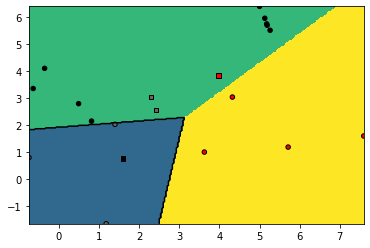

In [45]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# λ = 1.0

In [46]:
param_lambda=1.0

iter: 0 loss: 1.930589
iter: 100 loss: 1.101501
iter: 200 loss: 1.047951
iter: 300 loss: 1.040510
iter: 400 loss: 1.056595
iter: 500 loss: 1.056173
iter: 600 loss: 1.056134
iter: 700 loss: 1.056130
iter: 800 loss: 1.056129
iter: 900 loss: 1.056129
Accuracy:  0.55
Precision & recall for class 0 :  (0.0, nan)
Precision & recall for class 1 :  (1.0, 0.5263157894736842)
Precision & recall for class 2 :  (0.2, 1.0)


C:\Users\Filip\git\DU\lab1\data.py:132: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_i = tp_i / (tp_i + fp_i)
C:\Users\Filip\git\DU\lab1\data.py:73: UserWarning: No contour levels were found within the data range.
  plt.contour(xx0, xx1, values, colors='black', levels=[offset])


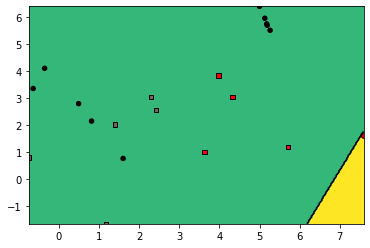

In [47]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# 5. Konfigurabilni duboki modeli u PyTorchu (20% bodova)

Izvedite razred PTDeep te isprobajte konfiguraciju [2, 3] na istim podatcima kao i u prethodnom zadatku (ispitni program će vam biti vrlo sličan). Provjerite da su rezultati isti kao i ranije.

C:\Users\Filip\git\DU\lab1\pt_deep.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, device=self.cuda)


iter:  0  loss:  tensor(4.3062, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.5653, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.5121, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.4885, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.4760, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.4684, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.4633, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.4597, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.4570, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.4549, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.85
Precision & reca

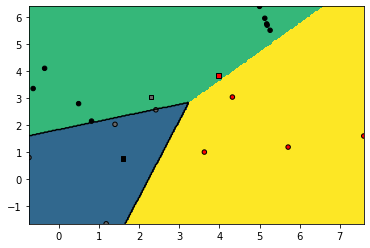

In [48]:
import pt_deep

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(4, 3, 5)
Yoh_ = data.class_to_onehot(Y_)

# definiraj model:
parameter_list = [2, 3]
ptd = pt_deep.PTDeep(parameter_list)

X = torch.from_numpy(X)

ptd.train(X, Y_, 1000, 0.1)

# dohvati vjerojatnosti na skupu za učenje
probs = ptd.evaluate(X)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

Rezultat pokretanja modela PTDeep s konfiguracijom [2,3] jednak je kao i kod implementacije logističke regresije u zadatku 4.

Napišite metodu count_params koja će ispisati simboličko ime i dimenzije tenzora svih parametara. Dodatno, neka funkcija računa i ukupan broj parametara modela (npr. za konfiguraciju [2, 3] rezultat bi trebao biti 9). Za obilazak svih parametara modela sada elegantno možemo koristiti iterator named_parameters.

In [49]:
print(ptd.count_parameters())

9


Isprobajte vaš kod na podatcima dobivenim pozivima data.sample_gmm_2d(4, 2, 40) i data.sample_gmm_2d(6, 2, 10), za konfiguracije [2, 2], [2, 10, 2] i [2, 10, 10, 2]. Ispišite točnost, odziv, preciznost i prosječnu preciznost te grafički prikažite rezultate klasifikacije i izgled decizijske plohe. Ako ne dođe do konvergencije, obratite pažnju na vrijednosti hiperparametara.

## Dataset: (4,2,40)

In [50]:
import pt_deep

# aktivacijska funkcija -> relu (zglobnica)
def activation(X):
    return torch.relu(X)

np.random.seed(100)

X,Y_ = data.sample_gmm_2d(4, 2, 40)
X = torch.from_numpy(X)

## Konfiguracija: [2, 2]

iter:  0  loss:  tensor(3.2670, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.4551, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.4449, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.4424, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.4416, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.4414, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.4413, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.4412, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.4412, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.4412, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.675
Precision & rec

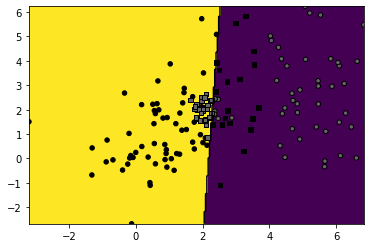

In [51]:
parameter_list = [2,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 2]

iter:  0  loss:  tensor(8.1810, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.3711, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.3498, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.3231, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.3129, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.3060, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.3005, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.2964, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.2936, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.2917, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.89375
Precision & r

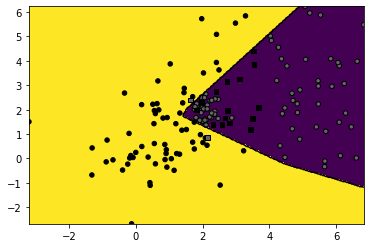

In [52]:
parameter_list = [2,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 10, 2]

iter:  0  loss:  tensor(5.2581, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.3518, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.3136, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.2862, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.2769, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.2678, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.2603, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.2578, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.2511, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.2498, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.9
Precision & recal

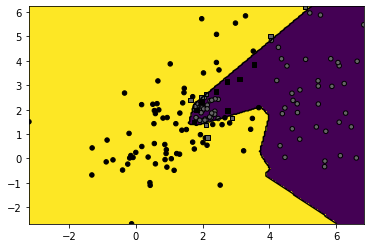

In [53]:
parameter_list = [2,10,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Dataset: (6,2,10)

In [54]:
np.random.seed(100)
X,Y_ = data.sample_gmm_2d(6, 2, 10)
X = torch.from_numpy(X)

## Konfiguracija: [2, 2]

iter:  0  loss:  tensor(1.4539, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.6686, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.6682, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.6
Precision & recal

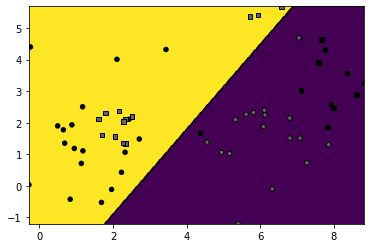

In [55]:
parameter_list = [2,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 2]

iter:  0  loss:  tensor(2.4640, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.5764, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.5341, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.4947, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.4765, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.4649, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.4565, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.4500, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.4453, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.4419, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.75
Precision & reca

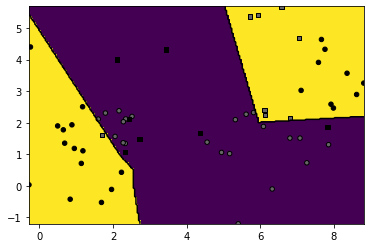

In [56]:
parameter_list = [2,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

## Konfiguracija: [2, 10, 10, 2]

iter:  0  loss:  tensor(5.7283, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.4895, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.4703, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.4479, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.4268, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.4778, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.3700, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.4154, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.3911, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.3557, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.8333333333333334
Pr

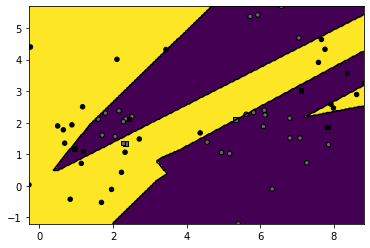

In [57]:
parameter_list = [2,10,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

Usporedite rezultate s onim što se zbiva kad za prijenosnu funkciju postavite sigmoidu. Sigmoida bi za ovakve male probleme zbog neprekidnosti trebala postići bolje rezultate od zglobnice. Glavna prednost zglobnice je u tome što nema zasićenje pa kod dubljih modela gradijenti teže nestaju.

iter:  0  loss:  tensor(0.7222, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  100  loss:  tensor(0.6361, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  200  loss:  tensor(0.6055, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  300  loss:  tensor(0.5856, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  400  loss:  tensor(0.5693, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  500  loss:  tensor(0.5537, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  600  loss:  tensor(0.5380, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  700  loss:  tensor(0.5222, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  800  loss:  tensor(0.5067, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
iter:  900  loss:  tensor(0.4915, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Accuracy:  0.8166666666666667
Pr

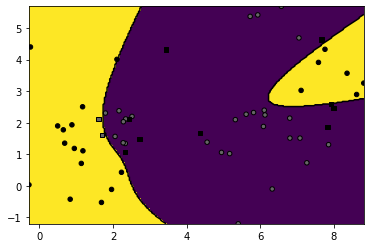

In [58]:
# aktivacijska funkcija -> sigmoida
def activation(X):
    return torch.sigmoid(X)

parameter_list = [2,10,10,2]
ptd = pt_deep.PTDeep(parameter_list, activation)
ptd.train(X, Y_, 1000, 0.1)
Y = ptd.evaluate(X)
accuracy, pr, M = data.eval_perf_multi(Y, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, Y)
plt.show()

# 6. Usporedba s jezgrenim SVM-om (10% bodova)

Isprobajte vaš razred na podacima dvaju razreda uzorkovanih iz mješavina Gaussovih distribucija. Kao i obično, ispišite pokazatelje performanse (točnost, odziv, preciznost, prosječnu preciznost).

Usporedite performansu modela koje implementiraju razredi PTDeep i KSVMWrap na većem broju slučajnih skupova podataka. Koje su prednosti i nedostatci njihovih funkcija gubitka? Koji od dvaju postupaka daje bolju garantiranu performansu? Koji od postupaka može primiti veći broj parametara? Koji bi od postupaka bio prikladniji za 2D podatke uzorkovane iz mješavine Gaussovi distribucija?

Iscrtajte decizijsku plohu i rezultate klasifikacije RBF SVM-a. Iskoristite argument special funkcije data.graph_data da u prikazu podataka posebno istaknete potporne vektore.

C:\Users\Filip\git\DU\lab1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


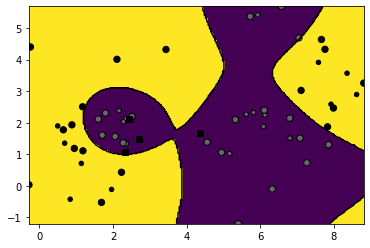

Accuracy:  0.9333333333333333  Recall:  0.8666666666666667 Precision:  1.0


In [59]:
import ksvm_wrap

np.random.seed(100)
X, Y_ = data.sample_gmm_2d(6,2,10)
model = ksvm_wrap.KSVMWrap(X,Y_)

probs = model.predict(X)
rect = (np.min(X, axis=0), np.max(X, axis=0))
special=model.support_indices()
data.graph_surface(lambda X: model.predict(X), rect)
data.graph_data(X, Y_, probs, special)
plt.show()

accuracy, recall, precision = model.get_scores(X, Y_)
print("Accuracy: ", accuracy, " Recall: ", recall, "Precision: ", precision)

# 7. Studija slučaja: MNIST (20% bodova)

Za model konfiguracije [784, 10] iscrtajte i komentirajte naučene matrice težina za svaku pojedinu znamenku. Ponovite za različite iznose regularizacije.

Naučite duboke modele s konfiguracijama [784, 10], [784, 100, 10], [784, 100, 100, 10] i [784, 100, 100, 100, 10]. Ako nemate funkcionalan GPU ne morate provoditi eksperimente s posljednje dvije konfiguracije. Nakon svake epohe učenja pohranite gubitak. Obratite pažnju na to da će dublji modeli bolje konvergirati s više iteracija s manjim korakom. Usporedite modele s obzirom na kretanje gubitka kroz epohe te pokazatelje performanse (točnost, preciznost, odziv) na skupovima za učenje i testiranje. Za najuspješniji model iscrtajte podatke koji najviše doprinose funkciji gubitka.

Proučite utjecaj regularizacije na performansu dubokih modela na skupovima za učenje i testiranje.

Slučajno izdvojite 1/5 podataka iz skupa za učenje u skup za validaciju. Tijekom treniranja evaluirajte validacijsku performansu nakon završetka petlje po grupama podataka te na kraju vratite model s najboljom validacijskom performansom (engl. early stopping). Procijenite postignuti utjecaj na konačnu vrijednost funkcije cilja i generalizacijsku performansu.

Implementirajte stohastički gradijentni spust odnosno postupak učenja po mini-grupama. Prije svake epohe izmiješajte podatke, zatim ih podijelite u n grupa (engl. mini-batch) i onda provedite korak učenja za svaku grupu posebno. Pripazite na to da gubitak karakterizirate tako da ne ovisi o veličini grupe jer je tako lakše interpretirati iznos gubitka te validirati korak učenja. Vaš kod pohranite u metodi train_mb. Procijenite utjecaj na kvalitetu konvergencije i postignutu performansu za najuspješniju konfiguraciju iz prethodnog zadatka. Napomena: u svrhu razumijevanja postupka učenja po mini-grupama, u ovoj vježbi nije dozvoljeno korištenje razreda torch.utils.data.DataLoader.

Promijenite optimizator u torch.optim.Adam s fiksnim korakom učenja 1e-4. procijenite utjecaj te promjene na kvalitetu konvergencije i postignutu performansu.

Isprobajte ADAM s varijabilnim korakom učenja. U izvedbi se pomognite funkcijom torch.optim.lr_scheduler.ExponentialLR, koju valja pozvati nakon svake epohe kao što je preporučeno u dokumentaciji). Neka početni korak učenja bude isti kao i ranije, a ostale parametre postavite na gamma=1-1e-4.

Izračunajte i interpretirajte gubitak slučajno incijaliziranog modela (dakle, modela koji nije vidio podatke za učenje).